![title](Innomatics-Research-Labs.png)

# Case Study

In [2]:
# Importing neccessary libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# Load the dataset

df=pd.read_excel('current.xlsx',index_col=0)

In [4]:
# To know the no of rows and columns in the dataset

df.shape

(25715, 7)

In [5]:
# Returns the last 4 observations from dataset

df.tail(4)

,title,location,price(L),rate_persqft,area_insqft,building_status,agent_rating
25711,2 BHK Independent House,Kundanpally,25.74,3961,650,Ready to move,0.0
25712,3 BHK Apartment,Peeramcheru,81.00,4500,1800,Ready to move,0.0
25713,2 BHK Apartment,Nizampet,34.50,3833,900,Under Construction,0.0
25714,2 BHK Apartment,Chandanagar,40.00,4444,900,Under Construction,0.0


# Client's specified  **Price** range 25 to 40 L

In [6]:
d=df[(df['price(L)']>=25.00)&(df['price(L)']<=40.00)]
d.shape

(4789, 7)

# Client's required locations

In [7]:
d1=d[(d['location']=='Gachibowli')|(d['location']=='Miyapur')|(d['location']=='Kukatpally')]
d1.shape

(85, 7)

### Finding properties under the required features

In [8]:
d2=d1['title'].value_counts()
d2

2 BHK Apartment            55
Residential Plot           15
1 BHK Apartment             8
3 BHK Apartment             5
1 RK Studio Apartment       1
2 BHK Independent Floor     1
Name: title, dtype: int64

### Client requires only Apartment's

In [9]:
# Setting the title to index to extract required data.

d1.set_index(keys='title',inplace=True)

In [10]:
# Returns top 5 observations from the data 

d1.head(5)

,location,price(L),rate_persqft,area_insqft,building_status,agent_rating
title,,,,,,
2 BHK Apartment,Miyapur,26.0,2600,1000,Ready to move,5.0
2 BHK Apartment,Miyapur,29.0,2504,1158,Under Construction,5.0
3 BHK Apartment,Miyapur,40.0,2439,1640,Under Construction,0.0
Residential Plot,Gachibowli,40.0,2222,1800,New,3.6
2 BHK Apartment,Miyapur,29.0,2406,1205,Under Construction,0.0


### Finding the properties having Apartment

In [11]:
d3=d1.filter(like='Apartment',axis=0)
d3.head(5)

,location,price(L),rate_persqft,area_insqft,building_status,agent_rating
title,,,,,,
2 BHK Apartment,Miyapur,26.0,2600,1000,Ready to move,5.0
2 BHK Apartment,Miyapur,29.0,2504,1158,Under Construction,5.0
3 BHK Apartment,Miyapur,40.0,2439,1640,Under Construction,0.0
2 BHK Apartment,Miyapur,29.0,2406,1205,Under Construction,0.0
2 BHK Apartment,Miyapur,29.0,2412,1202,Under Construction,0.0


In [12]:
# Resetting the index

d3.reset_index(inplace=True)
d3.head()

,title,location,price(L),rate_persqft,area_insqft,building_status,agent_rating
0,2 BHK Apartment,Miyapur,26.0,2600,1000,Ready to move,5.0
1,2 BHK Apartment,Miyapur,29.0,2504,1158,Under Construction,5.0
2,3 BHK Apartment,Miyapur,40.0,2439,1640,Under Construction,0.0
3,2 BHK Apartment,Miyapur,29.0,2406,1205,Under Construction,0.0
4,2 BHK Apartment,Miyapur,29.0,2412,1202,Under Construction,0.0


In [13]:
#d3.drop(columns='index',inplace=True)

In [14]:
# Returns no. of rows and columns  after filtering of the dataset

d3.shape

(69, 7)

### Describes the statistics of the filtered dataset

In [15]:
d3.describe()

,price(L),rate_persqft,area_insqft,agent_rating
count,69.000000,69.000000,69.000000,69.000000
mean,33.875217,3415.101449,1030.811594,2.621739
std,4.727725,809.044283,218.454617,2.219027
min,25.000000,2055.000000,558.000000,0.000000
25%,30.120000,3013.000000,925.000000,0.000000
50%,35.000000,3500.000000,1013.000000,4.100000
75%,37.000000,3733.000000,1140.000000,4.600000
max,40.000000,6333.000000,1640.000000,5.000000


# Univariate Analysis 

## Title

In [16]:
# Count of each property 

d4=d3['title'].value_counts()
d4

2 BHK Apartment          55
1 BHK Apartment           8
3 BHK Apartment           5
1 RK Studio Apartment     1
Name: title, dtype: int64

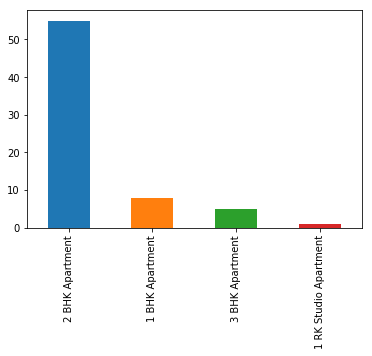

In [17]:
d4.plot.bar()

### Observations:
- There are almost 55 2BHK Apartments,8 1BHK Apartments,5 3BHK Apartments,1 1RK Studio Apartment.

## Location

In [18]:
d5=d3['location'].value_counts()
d5

Miyapur       48
Kukatpally    19
Gachibowli     2
Name: location, dtype: int64

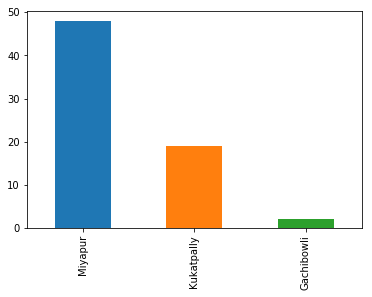

In [19]:
d5.plot.bar()

### Observations:
- There are almost 48 properties in Miyapur ,19 properties in Kukatpally,2 properties in Gachibowli.

## Price

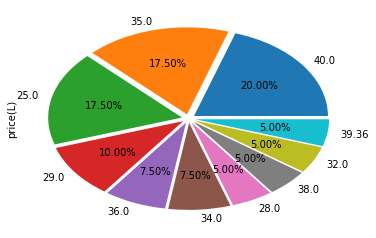

In [20]:
explode=(0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05) # Distance between each sub-pie.
d3['price(L)'].value_counts(ascending=False).head(10).plot('pie',autopct="%0.2f%%",explode=explode)

#### Observation:
   - Approximately 20% of properties are in the price range of 40L.
   - And also 17.50% of properties lies in price range of 35 and 25 L, 10 % of properties lies  in the price range of 29 L . 

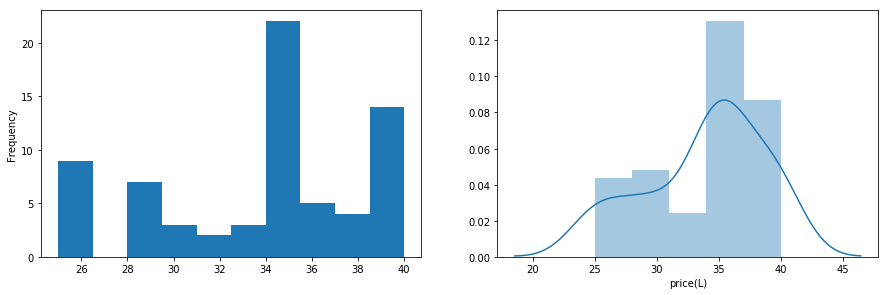

In [21]:
f,ax=plt.subplots(figsize=(15,10)) # Plot size
ax2=plt.subplot(223)
d3['price(L)'].plot.hist() # Histogram for all prices.
ax2.plot

ax3=plt.subplot(224)
sns.distplot(d3['price(L)'],ax=ax3) # Distribution plot for all prices.

### Observations:
- There are almost 23 properties having price range of 34 to 35 L.
- There is 0.12 probability for having the price range of 34 to 35 L.

## Rate_persqft & Area_insqft

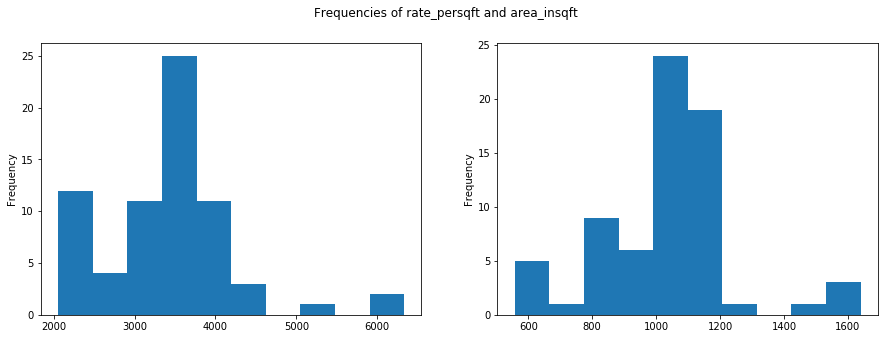

In [22]:
f,ax=plt.subplots(1,2,figsize=(15,5))
f.suptitle("Frequencies of rate_persqft and area_insqft") # Plot title
d3['rate_persqft'].plot('hist',ax=ax[0]) # Histogram for rate_persqft.

d3['area_insqft'].plot('hist',ax=ax[1]) # Histogram for area_insqft.

### Observations:
- There are almost 25 properties having 3500 rate per sqft.
- There are almost 24 properties having 1000 to 1100 area in sqft.

## Building Status

In [23]:
d3['building_status'].value_counts()

Ready to move         40
Under Construction    29
Name: building_status, dtype: int64

Text(0.5,1,'status of property')

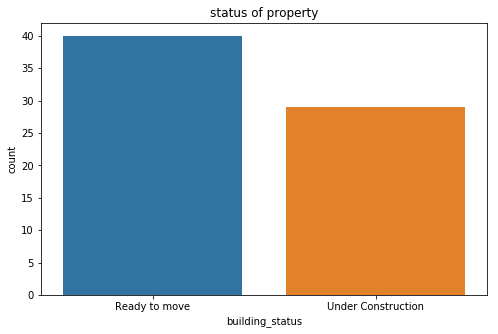

In [24]:
fig,ax=plt.subplots(figsize=(8,5))
sns.countplot(d3['building_status'],ax=ax) # Count plot
plt.title("status of property") # Plot title

### Observations:
- There are almost 40 properties are ready to move.
- There are almost 28 properties are under construction.

# Client's required area in sqft

In [25]:
d4=d3[(d3['area_insqft']>=1000)]
d4.shape

(48, 7)

### Client's required properties 

In [40]:
d5=d4[(d4['title']=='2 BHK Apartment')|(d4['title']=='3 BHK Apartment')]
d5.shape

(46, 7)

### Count of the properties

In [27]:
d5['title'].value_counts()

2 BHK Apartment    41
3 BHK Apartment     5
Name: title, dtype: int64

# Bivariate Analysis

## Title vs Price 

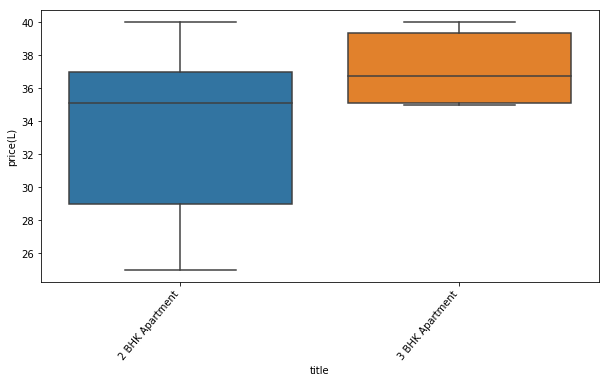

In [28]:
fig,ax=plt.subplots(figsize=(10,5))
sns.boxplot(y='price(L)',x='title',data=d5,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation=50,ha='right')
plt.show()

#### Observation:
   - Mostly, there are more 2 BHK Apartments in the range of 29L to 37L.
   - And also there are 3 BHK Apartments in the range of 35L to 39L
   

## Location vs Price

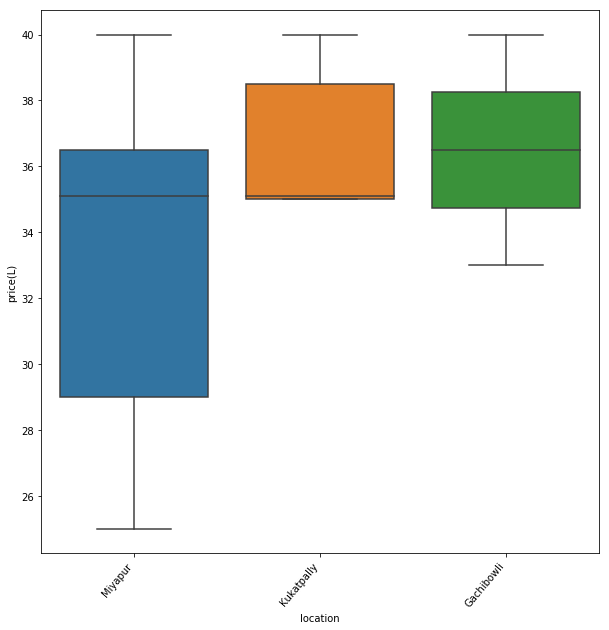

In [29]:
fig,ax=plt.subplots(figsize=(10,10))
sns.boxplot(y='price(L)',x='location',data=d5,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation=50,ha='right')
plt.show()

#### Observation:
   - Miyapur has more no of apartments in the price range of 29L to 36.5L
   - Kukatpally has apartments in the range of 35L to 38.5L
   - Gachibowli has apartments in the range of 34.4L to 38.5L

## Area_insqft vs Rate_persqft

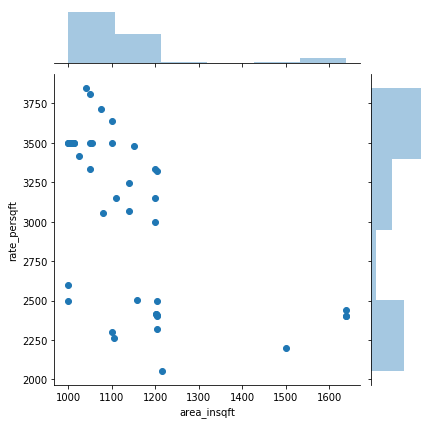

In [30]:
sns.jointplot(x="area_insqft", y="rate_persqft", data=d5)

#### Observation:
   - There is an increasing of rate per sqft for the range of 1000 to 1200 area in sqft


## Area_insqft vs Price

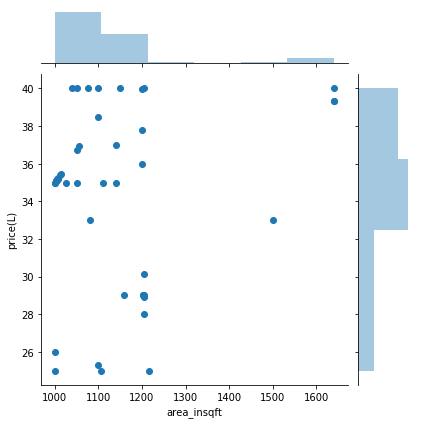

In [31]:
sns.jointplot(x="area_insqft", y="price(L)", data=d5)

#### Observation:
   - There is an increasing of rate per sqft for the decreasing of area in sqft

# Multivariate Analysis

## Location vs Price for title

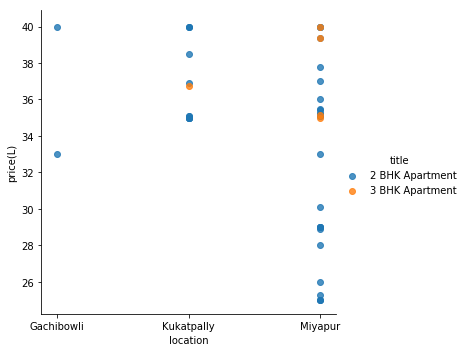

In [32]:
sns.lmplot(x='location', y='price(L)', hue='title', 
           data=d5,fit_reg=False) 

#### Observation:
   - Miyapur has more no of Apartments for the given price range.

## Location vs Price for building status

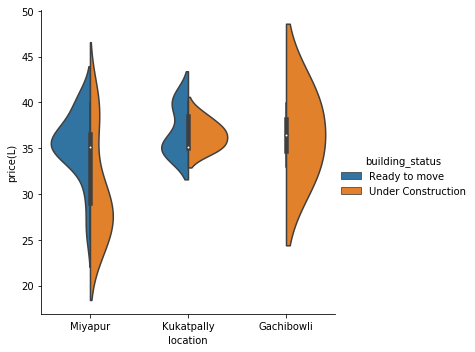

In [33]:
sns.catplot(x="location", y="price(L)", hue="building_status",split=True, kind="violin", data=d5);

#### Observation:
   - Miyapur has buildings which are ready to move and under construction
   - Ready to move buildings are more in the price range of 30L to 43L
   - Under construction buildings are more in the price range of 33L to 21L 

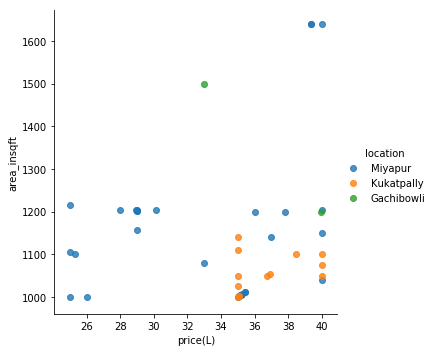

In [34]:
sns.lmplot(x="price(L)", y="area_insqft", hue="location", 
           data=d5,fit_reg=False) 

#### Observation:
   - There are more locations in the area range of 1000 to 1220 area in sqft
   - Miyapur is having more properties in the range of 1000 to 1100 area in sqft

## Price vs Area_insqft for title

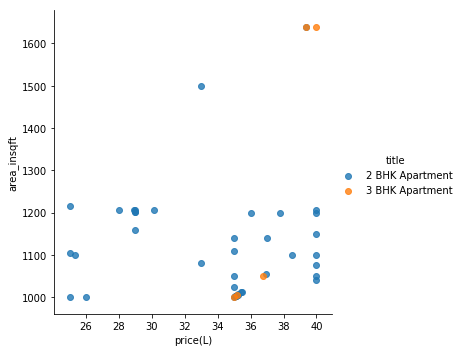

In [35]:
sns.lmplot(x="price(L)", y="area_insqft", hue="title", 
           data=d5,fit_reg=False) 

#### Observation:
   - More no of 2 BHK Apartments are having 1000 to 1100 area in sqft

## Area_insqft vs rate_persqft for location

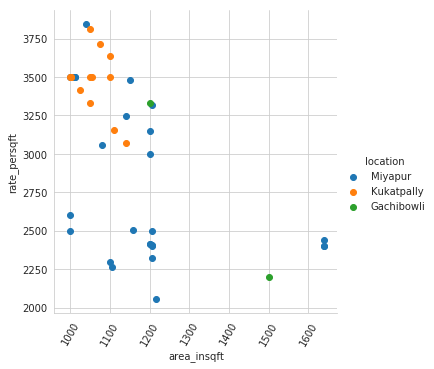

In [36]:
sns.set_style("whitegrid");
ax=sns.FacetGrid(d5,hue='location',height=5).map(plt.scatter,'area_insqft','rate_persqft').add_legend()
ax.set_xticklabels(rotation=60)
ax.set_xlabels()
plt.show()

#### Observation:
   - Miyapur is having more no of plot in the range of 1000 to 1200 area in sqft.
   - Kukatpally is having more no of plots in the range of 3000 to 3800 rate per sqft

## Corelation b/w Price, Rate_persqft, Area_insqft & Agent rating

In [37]:
d5.corr()

,price(L),rate_persqft,area_insqft,agent_rating
price(L),1.000000,0.691705,0.144277,-0.278001
rate_persqft,0.691705,1.000000,-0.609346,-0.174956
area_insqft,0.144277,-0.609346,1.000000,-0.027115
agent_rating,-0.278001,-0.174956,-0.027115,1.000000


- The main result of a correlation is called the correlation coefficient (or "r")

- It ranges from -1.0 to +1.0. The closer r is to +1 or -1, the more closely the two variables are related.
- If r is close to 0, it means there is no relationship between the variables. If r is positive, it means that as one variable gets larger the other gets larger. If r is negative it means that as one gets larger, the other gets smaller (often called an "inverse" correlation).

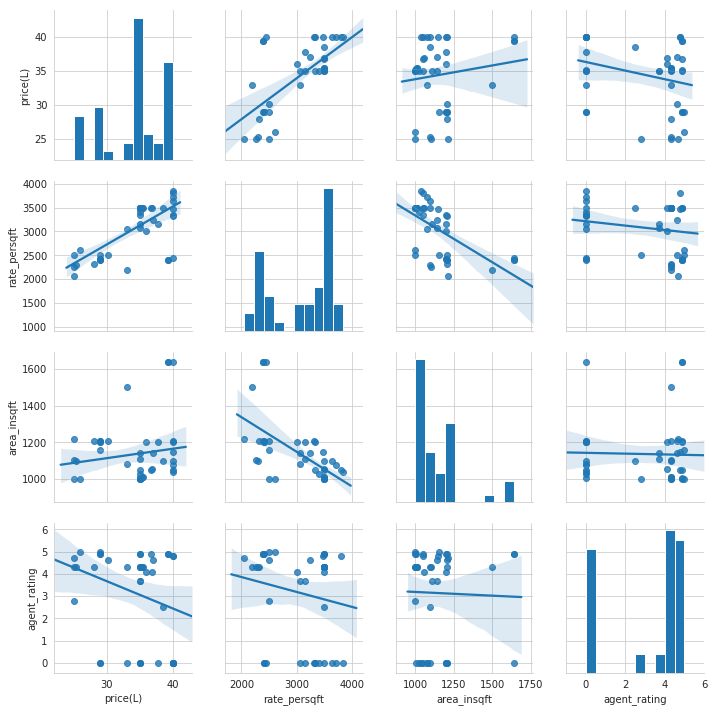

In [38]:
sns.pairplot(d5,kind='reg')

#### Observation:
- For the price range considered highest correlation is between rate_persqft and price,they both have positive correlation.
- Negative correlation exists between area_insqft and rate_persqft.
- There's not much correlation between price and area_insqft.

# Conclusion
- In conclusion to case study, 20% of properties have price 40L.
- There are  different ranges of  prices in Miyapur
- Finally there are 46 properties that suits to the requirements of client.